Fraud Detection Algorithms
--

Loading Cleaned Dataset

----

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
df = pd.read_csv("Cleaned_data.csv")
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent,Transaction_Frequency,Amount_Per_Transaction_Age,High_Risk_Location
0,T1,4174,0.025758,ATM Withdrawal,16.0,Tablet,San Francisco,0,1.000000,13,Debit Card,0,0.60,0.000429,0
1,T2,4507,0.030995,ATM Withdrawal,13.0,Mobile,New York,4,0.661017,3,Credit Card,0,0.40,0.000775,0
2,T3,1860,0.047807,ATM Withdrawal,12.0,Mobile,Unknown,3,0.966102,9,Unknown,0,0.32,0.000824,0
3,T4,2294,0.001902,Bill Payment,15.0,Desktop,Chicago,4,0.016949,4,UPI,0,0.72,0.000999,1
4,T5,2130,0.029714,POS Payment,19.0,Mobile,San Francisco,2,0.474576,7,Credit Card,0,0.28,0.001026,0


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_new = df.copy()

# Label Encoding for Categorical Features
categorical_cols = ["Transaction_Type", "Device_Used", "Location", "Payment_Method"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_new[col] = le.fit_transform(df_new[col])
    label_encoders[col] = le


In [4]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50162 entries, 0 to 50161
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    50162 non-null  object 
 1   User_ID                           50162 non-null  int64  
 2   Transaction_Amount                50162 non-null  float64
 3   Transaction_Type                  50162 non-null  int64  
 4   Time_of_Transaction               50162 non-null  float64
 5   Device_Used                       50162 non-null  int64  
 6   Location                          50162 non-null  int64  
 7   Previous_Fraudulent_Transactions  50162 non-null  int64  
 8   Account_Age                       50162 non-null  float64
 9   Number_of_Transactions_Last_24H   50162 non-null  int64  
 10  Payment_Method                    50162 non-null  int64  
 11  Fraudulent                        50162 non-null  int64  
 12  Tran

In [5]:
df_new

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent,Transaction_Frequency,Amount_Per_Transaction_Age,High_Risk_Location
0,T1,4174,0.025758,0,16.0,2,6,0,1.000000,13,1,0,0.60,0.000429,0
1,T2,4507,0.030995,0,13.0,1,5,4,0.661017,3,0,0,0.40,0.000775,0
2,T3,1860,0.047807,0,12.0,1,8,3,0.966102,9,5,0,0.32,0.000824,0
3,T4,2294,0.001902,2,15.0,0,1,4,0.016949,4,4,0,0.72,0.000999,1
4,T5,2130,0.029714,4,19.0,1,6,2,0.474576,7,0,0,0.28,0.001026,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50157,T15074,3212,0.016296,1,20.0,2,0,0,0.559322,4,0,1,0.56,0.000480,1
50158,T39758,2029,0.010792,1,14.0,4,1,4,0.491525,12,1,0,0.48,0.000361,1
50159,T31261,2152,0.057851,3,3.0,1,4,1,0.627119,11,3,1,0.72,0.001523,0
50160,T12293,3345,0.043994,4,18.0,1,6,3,0.610169,5,0,0,0.56,0.001190,0


In [6]:
from sklearn.model_selection import train_test_split

x = df_new.drop(columns=["Fraudulent", "Transaction_ID", "User_ID"])  # Remove non-informative columns
y = df_new["Fraudulent"]  

x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
from imblearn.combine import SMOTETomek

# Apply SMOTE + Tomek to balance classes
smote_tomek = SMOTETomek(random_state=42)
x_train_resampled, y_train_resampled = smote_tomek.fit_resample(x_train, y_train)


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_resampled)
x_test_scaled = scaler.transform(x_test)

Train Different Models Using Cross-Validation

---

In [9]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

In [10]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    }

In [11]:
cv_results = {}

for model_name, model in models.items():
    if model_name == "Logistic Regression":  # Apply scaling only for logistic regression
        scores = cross_val_score(model, x_train_scaled, y_train_resampled, cv=5, scoring="roc_auc")
    else:
        scores = cross_val_score(model, x_train_resampled, y_train_resampled, cv=5, scoring="roc_auc")
    
    cv_results[model_name] = scores.mean()

# Print cross-validation results
for model, score in cv_results.items():
    print(f"{model}: Mean CV ROC-AUC = {score:.4f}")

Logistic Regression: Mean CV ROC-AUC = 0.6998
Decision Tree: Mean CV ROC-AUC = 0.7229
Random Forest: Mean CV ROC-AUC = 0.8175


Train the Best Model and Find the Optimal Threshold

---

In [12]:
# Train Logistic Regression (Best Model based on CV)
best_model = LogisticRegression(C=0.1, penalty='l2', max_iter=500, random_state=42)
best_model.fit(x_train_scaled, y_train_resampled)

# Predict probabilities
y_probs = best_model.predict_proba(x_test_scaled)[:, 1]  

# Find optimal threshold using ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
optimal_idx = (tpr - fpr).argmax()
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.2f}")


Optimal Threshold: 0.84


Evaluate the Model with the New Threshold

---

In [13]:
# Apply the optimal threshold
y_pred_optimal = (y_probs >= optimal_threshold).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_optimal)
precision = precision_score(y_test, y_pred_optimal)
recall = recall_score(y_test, y_pred_optimal)
f1 = f1_score(y_test, y_pred_optimal)
roc_auc = roc_auc_score(y_test, y_probs)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")


Accuracy: 0.9458
Precision: 0.0931
Recall: 0.0095
F1 Score: 0.0172
ROC-AUC Score: 0.4870


In [14]:
# Calculate final performance metrics
accuracy = accuracy_score(y_test, y_pred_optimal)
precision = precision_score(y_test, y_pred_optimal)
recall = recall_score(y_test, y_pred_optimal)
f1 = f1_score(y_test, y_pred_optimal)
roc_auc = roc_auc_score(y_test, y_probs)

# Print Evaluation Metrics
print("\nFinal Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")



Final Model Performance:
Accuracy: 0.9458
Precision: 0.0931
Recall: 0.0095
F1 Score: 0.0172
ROC-AUC Score: 0.4870


Compare Model Performance

---

In [15]:
# Print the cross-validation results
print("\nModel Performance (Mean CV ROC-AUC Scores):")
for model, score in cv_results.items():
    print(f"{model}: {score:.4f}")

# Select the best model based on ROC-AUC score
best_model_name = max(cv_results, key=cv_results.get)
print(f"\nBest Model: {best_model_name}")

# Retrieve the best model
best_model = models[best_model_name]

# Train the best model on the full training set
if best_model_name == "Logistic Regression":
    best_model.fit(x_train_scaled, y_train_resampled)
    y_probs = best_model.predict_proba(x_test_scaled)[:, 1]  # Probability scores
else:
    best_model.fit(x_train_resampled, y_train_resampled)
    y_probs = best_model.predict_proba(x_test)[:, 1]



Model Performance (Mean CV ROC-AUC Scores):
Logistic Regression: 0.6998
Decision Tree: 0.7229
Random Forest: 0.8175

Best Model: Random Forest


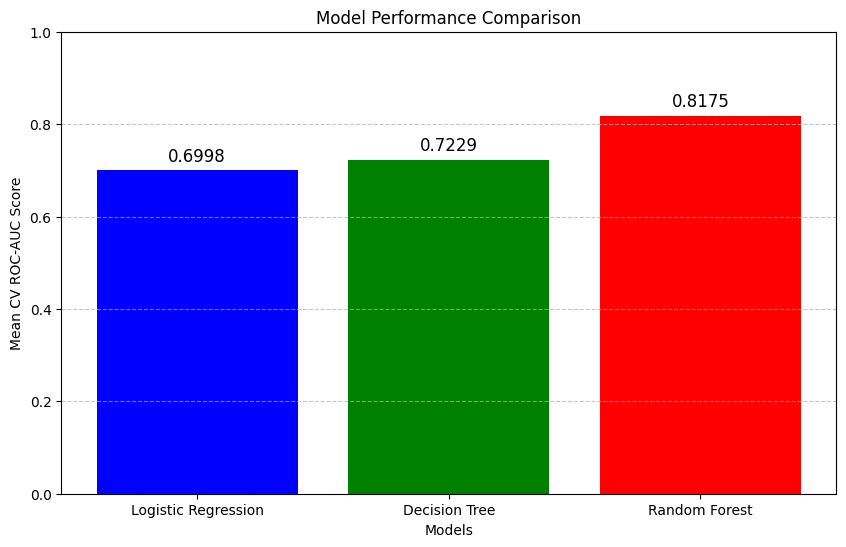

In [16]:
# Extract model names and their corresponding scores
models = list(cv_results.keys())
scores = list(cv_results.values())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, scores, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel("Models")
plt.ylabel("Mean CV ROC-AUC Score")
plt.title("Model Performance Comparison")
plt.ylim(0, 1)  # ROC-AUC score ranges from 0 to 1
plt.xticks()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display values on bars
for i, v in enumerate(scores):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center', fontsize=12)

plt.show()
